In [23]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [12]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [13]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [14]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [20]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print(f"processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        epochs=num_epochs, batch_size=16, verbose=0,
                        validation_data=(val_data, val_targets))
    
    mae_history = history.history['val_mae']  # Using 'val_mae' for validation MAE
    all_mae_histories.append(mae_history)



processing fold #0
processing fold #1
processing fold #2
processing fold #3


In [21]:
average_mae_history = [
  np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

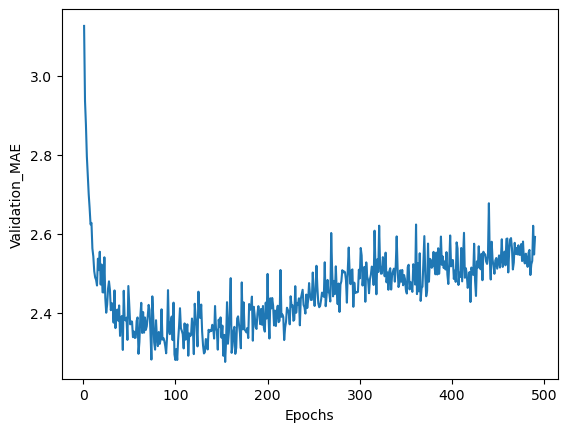

In [26]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) +1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation_MAE")
plt.show()

In [27]:
model = build_model()
model.fit(train_data, train_targets, epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 5ms/step - loss: 16.1463 - mae: 2.6202


In [28]:
test_mae_score

2.620216131210327

In [29]:
predictions = model.predict(test_data)

4/4 [==============================] - 0s 3ms/step


In [30]:
predictions[0]

array([8.327779], dtype=float32)